# Programming for Data Analysis

## Project 1 - Analysis of Games Sales.

#### Author: Sean Elliott
#### Student Number: G00411288
#### Lecturer: Dr Brian McGinley 

****

In [489]:
# Importing libraries for analysis

import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt 

# define location of dataset to pull data from - had to create own folder on github with the required data as couldnt scrape from the webiste.

games = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming-for-Data-Analysis/main/Assignment%201/Dataset/vgsales.csv')

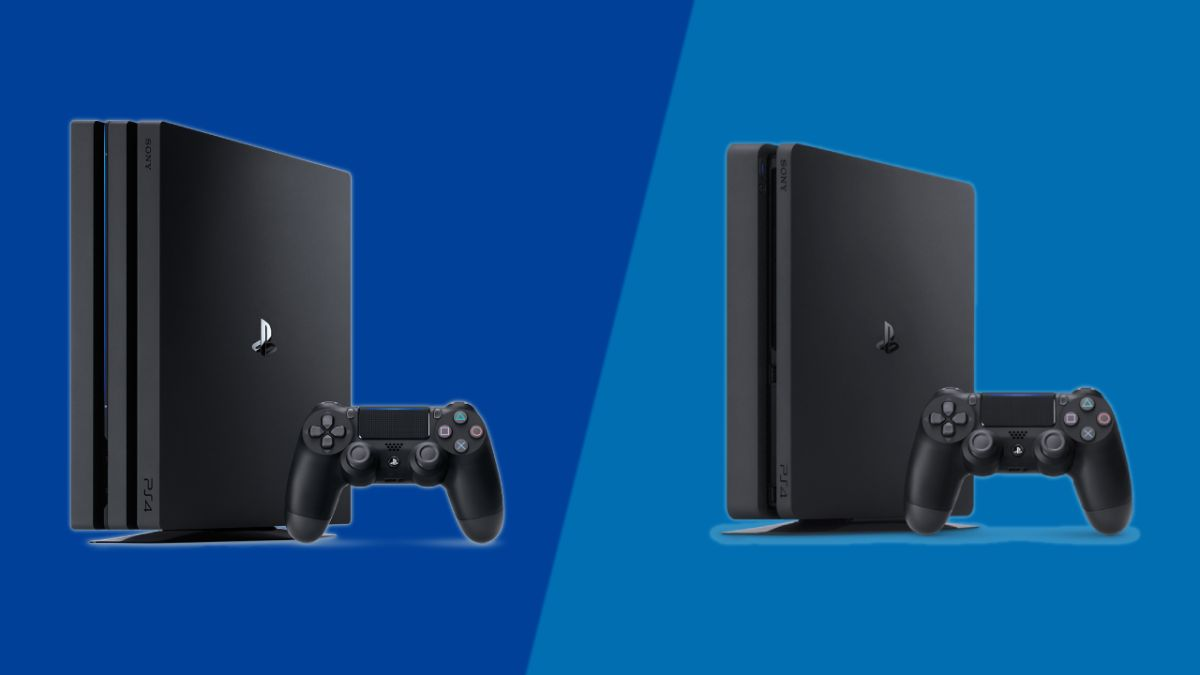


# Introduction

*****

For this project I will be analysing data from a Video Game Sales dataset. This dataset includes a few descriptions of note - Name of the Game, Genre of the Game, Publisher of the Game, Year of Production, Sales Region (broken down into North America, Europe, Japan and Other Regions and Global Sales; a combination of all sales regions) and also the Platform that the game is available on. This [dataset](https://www.kaggle.com/datasets/gregorut/videogamesales) and it's subsequent information have been scraped from [Github](https://github.com/GregorUT/vgchartzScrape.).

In [490]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


 For ease of access I will now clean the dataset - to remove unwanted data.

In [491]:
# ask the program to print the list of columns so that I can discern which data I want to analyse and which is extrenuous material.

games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [492]:
# ask the program to remove any unnessecary columns which will not help my analysis.

games = games.drop(columns = ['Rank'])

In [493]:
games.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


 Now that I have cleaned and organised the data set and figured out what information is in the set - I will start to analyse it further. 
 The first quesiton I will ask, based on the dataset, is which region had the most sales?

In [494]:
# I start by using the mean() function to find the average sales in the specific regions. The mean vaule must be multiplied
# by 1 million in order for the results to be shown in the millions.
# I then ask the program to print the results using an f'string and ask it to show me the answer correct to 3 decimal places. 

a = (games['EU_Sales'].mean()*1000000)
b = (games['JP_Sales'].mean()*1000000)
c = (games['NA_Sales'].mean()*1000000)
d = (games['Other_Sales'].mean()*1000000)
e = (games['Global_Sales'].mean()*1000000)

print('The average sales in Europe =', (F"${a:,.3f}"))
print('The average sales in Japan =', (F"${b:,.3f}"))
print('The average sales in North America =', (F"${c:,.3f}"))
print('The average sales in Other Regions =', (F"${d:,.3f}"))
print('The Global sales =', (F"${e:,.3f}"))

The average sales in Europe = $146,652.006
The average sales in Japan = $77,781.660
The average sales in North America = $264,667.430
The average sales in Other Regions = $48,063.020
The Global sales = $537,440.656


The findings above clearly show that North America is the most profitable market for selling video games based off the 
information from the dataset. I now want to show this in a more visually appealing way below:

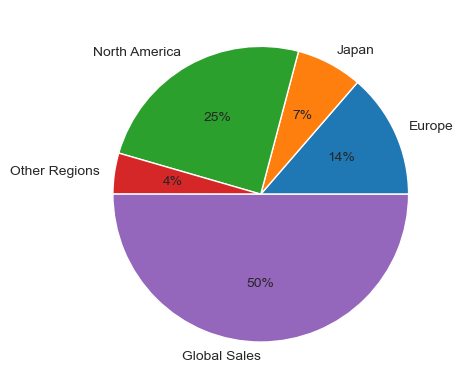

In [495]:
# I make a pie chart to show the results. I create two lists - the regions for sales and also the sales totals.
# I then plot these on the pie chart.

data = [146652.006, 77781.660, 264667.430, 48063.020, 537440.656]
labels = ['Europe', 'Japan', 'North America', 'Other Regions', 'Global Sales']

# the (autopct='%.0f%%') allows me to show the percentage values on the pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()


As we can see from the piechart above, North America appears to be the most profitable single region for selling video games.
We will now analyse what the most popular console sold is, using the 'Global Sales' data.

In [496]:
#Group the Global Sales based on platform 
consoles = pd.DataFrame(games.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
# Rename Platform column
consoles.rename(columns = {'Platform':'Consoles_Global'}, inplace = True)

#Concatenating our datasets
platsales=pd.concat([consoles],axis=1)
platsales.head(15)

,Consoles_Global,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49
5,PS,730.66
6,GBA,318.50
7,PSP,296.28
8,PS4,278.10
9,PC,258.82


I will now show the above console information in a donut plot which will highlihgt which is the most popular games console of the top 10 from the dataset.

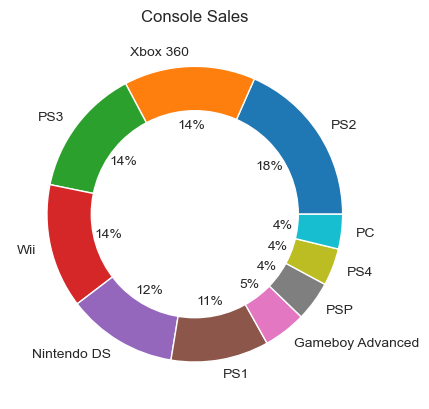

In [497]:
platsales = [1255.64, 979.96, 957.84, 926.71, 822.49, 730.66, 318.50, 296.28, 278.10, 258.82]
consoles = ['PS2', 'Xbox 360', 'PS3', 'Wii', 'Nintendo DS', 'PS1', 'Gameboy Advanced', 'PSP', 'PS4', 'PC']

plt.pie(platsales,labels =consoles,autopct='%.0f%%')
# add circle to centre 
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
# Adding Circle in donut plot
fig.gca().add_artist(centre_circle)
# Adding Title of donut plot
plt.title('Console Sales')

plt.show()

I will now investigate which are the most popular 'Genre' of games. We will be using the 'Global_Sales' column to complete this investigation.

In [498]:
genre = games.groupby('Genre')[["Global_Sales"]].sum().sort_values(by=['Global_Sales'], ascending=[False]).reset_index()
genre

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


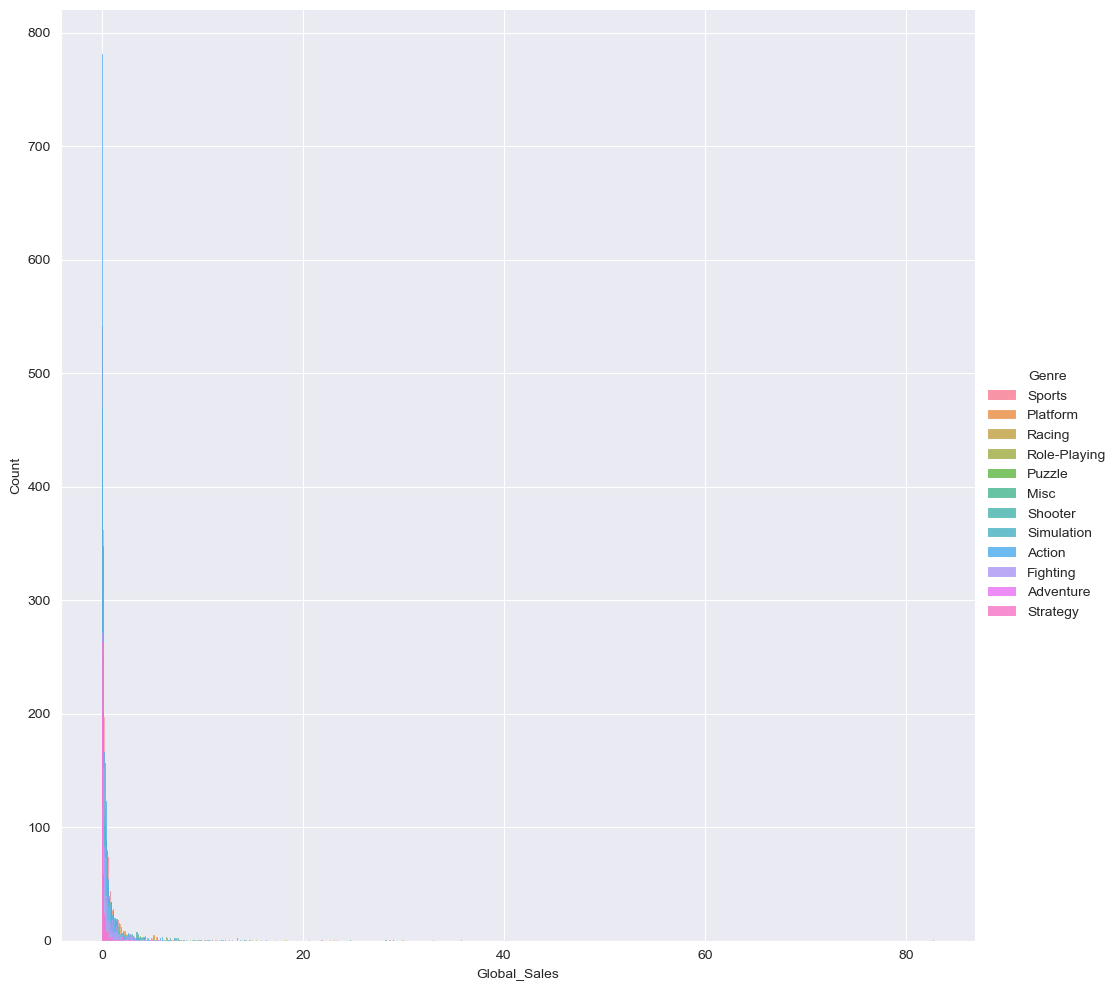

In [499]:
# I will now plot the above dataframe on a barchart for easier comparison 

sns.FacetGrid(games, hue='Genre', height=10).map(sns.histplot, "Global_Sales").add_legend()
plt.show()

 #= sns.load_dataset("diamonds")
#sns.catplot(
 #   data=diamonds.sort_values("color"),
 #   x="color", y="price", kind="boxen",
#)

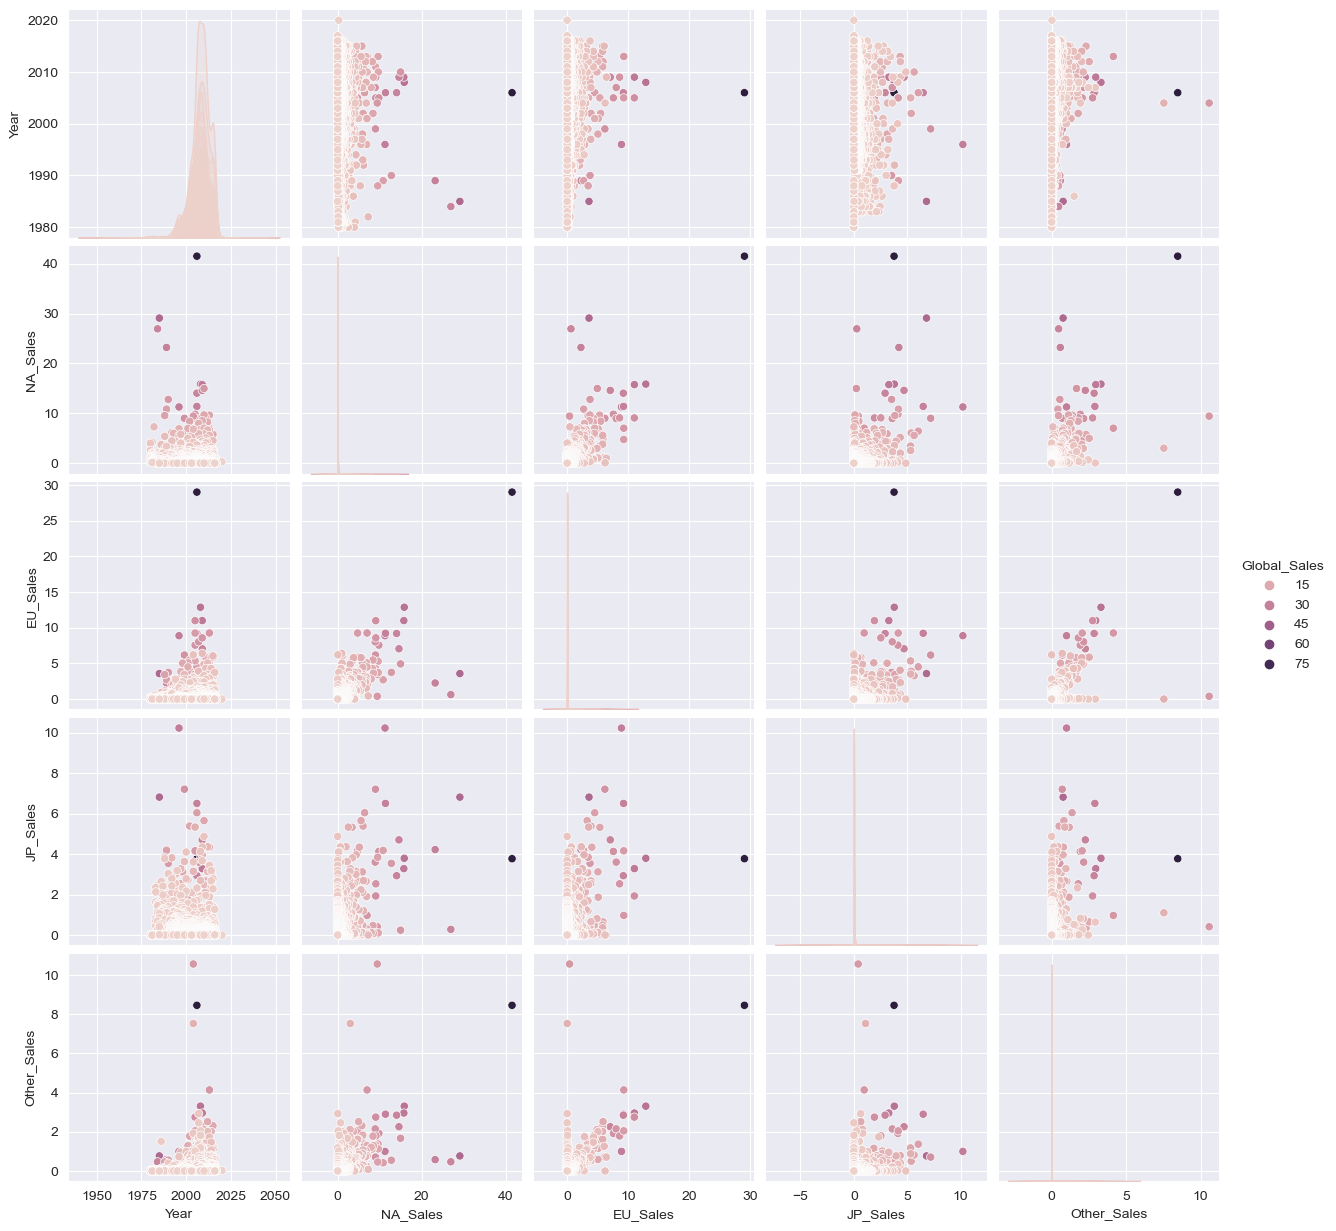

In [500]:
sns.set_style("darkgrid")
sns.pairplot(games, hue='Global_Sales')
plt.show()

I will now investigate the top 10 selling games globally; as you will see from the data below; 'Wii Sports' is the highest selling game globally (according to the dataset.) Please note that all displayed figures are in million dollars ($).

In [501]:
# I create a dataframe for the top 10 list of best selling games and display them below.
top10 = pd.DataFrame(games.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top10.head(10)

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


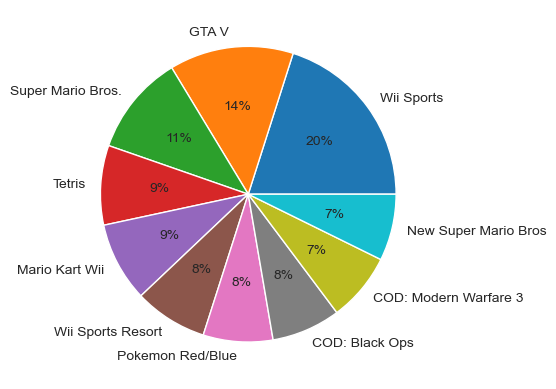

In [502]:
# I create another pie chart, this time showing the percentage of the top 10 highest selling games in comparison with one another.
piedata = [82.74, 55.92, 45.31, 35.84, 35.82, 33.00, 31.37, 31.03, 30.83, 30.01]
labels = ['Wii Sports', 'GTA V', 'Super Mario Bros.', 'Tetris', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Blue', 'COD: Black Ops', 'COD: Modern Warfare 3', 'New Super Mario Bros']
colors = sns.color_palette('pastel')[0:5]


# the (autopct='%.0f%%') allows me to show the percentage values on the pie chart
plt.pie(piedata, labels = labels, autopct='%.0f%%')
plt.show()

I will now investigate which year was the most profitable for the video game industry, highlighting which in which year the most videogames were sold, and what platform was the most popular.